## Problem 5: Exploring E-commerce Data
Dataset: Use a dataset containing e-commerce transaction data, including columns like CustomerID, ProductID, Purchase Date, and Price.

Tasks:

1. Load the dataset into a Pandas DataFrame.
2. Calculate the total revenue and the number of transactions.
3. Find the top 10 customers based on their total spending.
4. Identify the most popular products based on the number of times they were purchased.
5. Calculate the average time between purchases for each customer.
6. Plot the revenue trend over time.

In [1]:
import pandas as pd

ecomm_data = pd.read_csv('../data-files/ecommerce.csv')
ecomm_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
# setup visualization libraries
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### Find unique warehouse_blocks

In [3]:
col_values = ecomm_data['Warehouse_block'].unique()
print(col_values)

['D' 'F' 'A' 'B' 'C']


### Find mode of shipment by warehouse block

In [14]:
cols_of_interest = ['Warehouse_block', 'Mode_of_Shipment']
shipment_type = ecomm_data[cols_of_interest].groupby(cols_of_interest).size().reset_index(name='count')
print(shipment_type)

   Warehouse_block Mode_of_Shipment  count
0                A           Flight    297
1                A             Road    294
2                A             Ship   1242
3                B           Flight    296
4                B             Road    294
5                B             Ship   1243
6                C           Flight    295
7                C             Road    294
8                C             Ship   1244
9                D           Flight    297
10               D             Road    292
11               D             Ship   1245
12               F           Flight    592
13               F             Road    586
14               F             Ship   2488


### Visualize shipment by warehouses

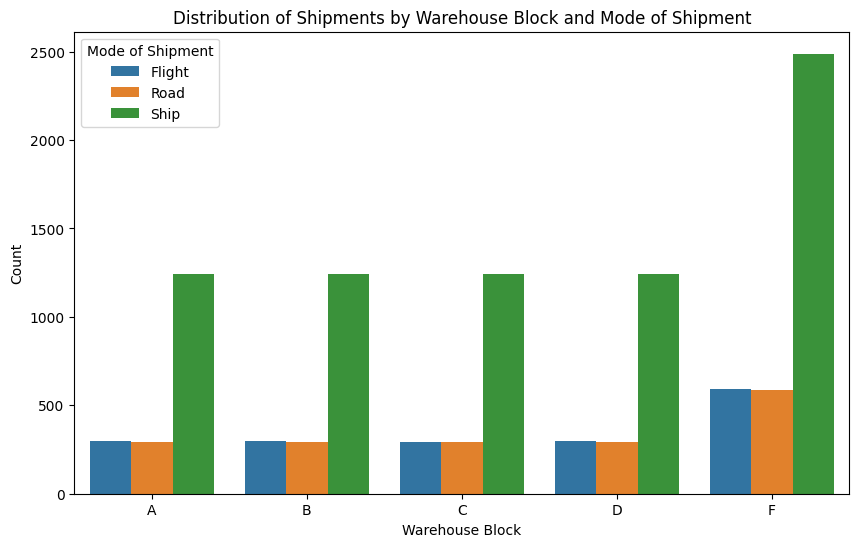

In [15]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Warehouse_block', y='count', hue='Mode_of_Shipment', data=shipment_type)

# Add labels and title
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.title('Distribution of Shipments by Warehouse Block and Mode of Shipment')

# Show the legend
plt.legend(title='Mode of Shipment')

plt.show()

### Lets explore customer care calls by Warehouse block

In [16]:
cols_of_interest = ['Warehouse_block', 'Customer_care_calls']
grouby = 'Warehouse_block'
calls_by_warehouse = ecomm_data[cols_of_interest].groupby(grouby)['Customer_care_calls'].sum().reset_index(name='count')
print(calls_by_warehouse)

  Warehouse_block  count
0               A   7402
1               B   7369
2               C   7451
3               D   7434
4               F  14939


#### Visualize

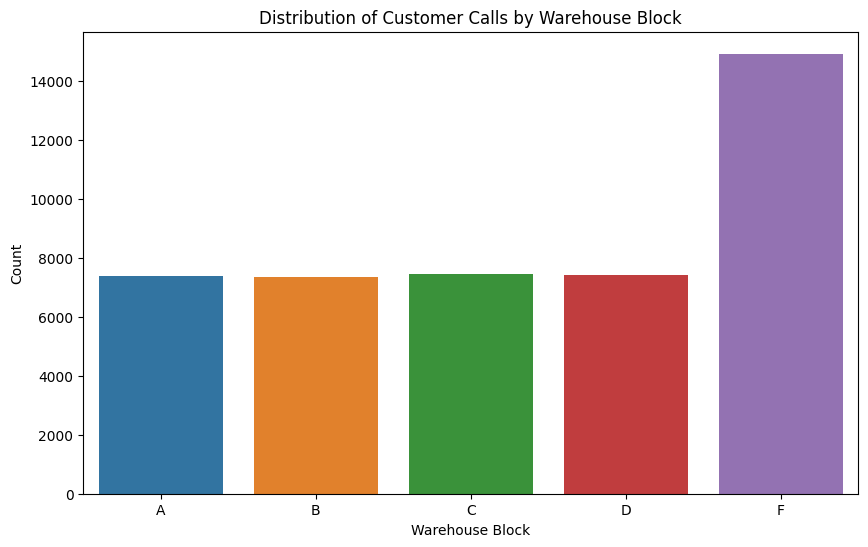

In [17]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Warehouse_block', y='count', data=calls_by_warehouse)

# Add labels and title
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.title('Distribution of Customer Calls by Warehouse Block')

plt.show()

### Explore customer rating by warehouse

In [18]:
cols_of_interest = ['Warehouse_block', 'Customer_rating']
rating_type = ecomm_data[cols_of_interest].groupby(cols_of_interest).size().reset_index(name='count')
print(rating_type)

   Warehouse_block  Customer_rating  count
0                A                1    394
1                A                2    376
2                A                3    345
3                A                4    350
4                A                5    368
5                B                1    371
6                B                2    376
7                B                3    371
8                B                4    348
9                B                5    367
10               C                1    364
11               C                2    362
12               C                3    383
13               C                4    369
14               C                5    355
15               D                1    364
16               D                2    340
17               D                3    390
18               D                4    379
19               D                5    361
20               F                1    742
21               F                2    711
22         

### Visualize customer ratings by warehouse

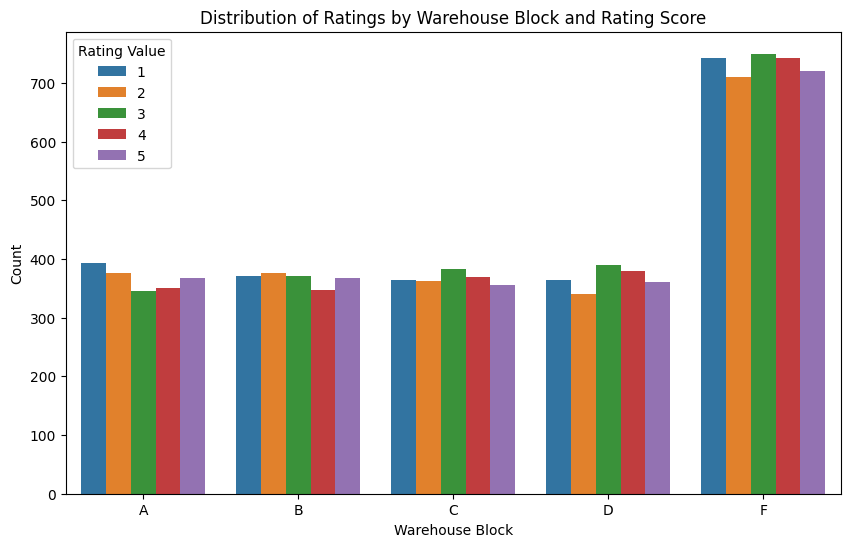

In [19]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Warehouse_block', y='count', hue='Customer_rating', data=rating_type)

# Add labels and title
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Warehouse Block and Rating Score')

# Show the legend
plt.legend(title='Rating Value')

plt.show()

### Observation
- The Warehouse F has a large count of shipment, as well as large volume of customer care calls as well